In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

visulaizing data


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
single_image = x_train[5999]

In [6]:
single_image

array([[[170, 182, 189],
        [170, 182, 188],
        [170, 182, 189],
        ...,
        [191, 201, 209],
        [190, 201, 209],
        [191, 200, 209]],

       [[170, 184, 191],
        [170, 183, 191],
        [171, 185, 192],
        ...,
        [195, 205, 212],
        [194, 205, 212],
        [195, 205, 213]],

       [[166, 181, 189],
        [166, 180, 188],
        [167, 182, 189],
        ...,
        [194, 205, 210],
        [194, 205, 210],
        [194, 204, 211]],

       ...,

       [[ 83, 102, 109],
        [ 85, 104, 111],
        [ 87, 106, 113],
        ...,
        [103, 120, 128],
        [102, 119, 127],
        [102, 119, 128]],

       [[ 84, 103, 110],
        [ 84, 103, 110],
        [ 85, 104, 111],
        ...,
        [ 96, 113, 121],
        [ 96, 113, 121],
        [ 97, 114, 122]],

       [[ 81, 100, 107],
        [ 81,  99, 106],
        [ 81, 100, 107],
        ...,
        [ 92, 109, 116],
        [ 93, 109, 117],
        [ 92, 109, 118]]

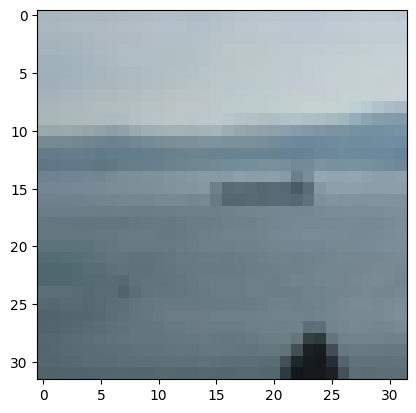

In [7]:
import matplotlib.pyplot as plt

plt.imshow(single_image )

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_example.shape

(50000, 10)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
single_image.max()

216

In [18]:
single_image.min()

17

In [19]:
x_train =x_train/216
x_test= x_test/216

In [20]:
scaled_image=x_train[0]


In [21]:
scaled_image.max()

1.1805555555555556

In [22]:
scaled_image.min()

0.0

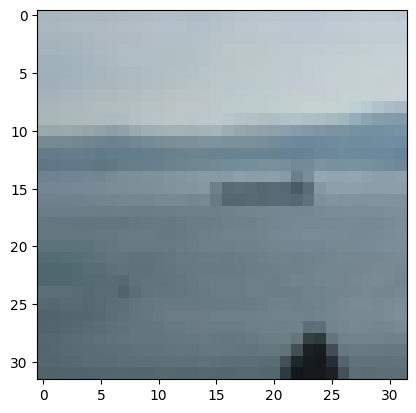

In [23]:

plt.imshow(single_image )

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_train = x_train.reshape(50000, 32, 32, 3, 1)

In [26]:
x_train.shape

(50000, 32, 32, 3, 1)

In [27]:
x_test = x_test.reshape(10000,32,32,3,1)

In [28]:
x_test.shape

(10000, 32, 32, 3, 1)

**model**

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the number of classes in your classification problem
num_classes = 10  # Replace 10 with the actual number of classes

# Create a sequential model
model = Sequential()

# Add a 2D convolutional layer with ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a 2D max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu'))
# Flatten the output before the fully connected layers
model.add(Flatten())

# Add fully connected layers with ReLU activation
model.add(Dense(125, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        16400     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 125)               288125    
                                                                 
 dense_1 (Dense)             (None, 10)                1260      
                                                        

In [32]:
model.fit(x_train, y_cat_train, epochs=20)


Epoch 1/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5066 - accuracy: 0.4628
Epoch 2/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1577 - accuracy: 0.5932
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0081 - accuracy: 0.6462
Epoch 4/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9086 - accuracy: 0.6854
Epoch 5/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8259 - accuracy: 0.7158
Epoch 6/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7467 - accuracy: 0.7439
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6793 - accuracy: 0.7661
Epoch 8/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6087 - accuracy: 0.7913
Epoch 9/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.5475 - accuracy: 0.8133
Epoch 10/20
1563/1563 [==============================] - 47s 30m

In [33]:
model.layers


In [34]:
model.metrics_names


['loss', 'accuracy']

In [35]:
model.evaluate(x_test , y_cat_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.6241 - accuracy: 0.6334


[2.624051570892334, 0.633400022983551]

In [36]:
from sklearn.metrics import classification_report

In [37]:
import numpy as np

In [38]:
prediction = model.predict(x_test)
prediction_classes = np.argmax(prediction, axis=1)



313/313 [==============================] - 2s 7ms/step


In [39]:
report = classification_report(y_test ,prediction_classes)
print(report)


              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1000
           1       0.77      0.78      0.78      1000
           2       0.54      0.52      0.53      1000
           3       0.42      0.45      0.43      1000
           4       0.56      0.57      0.57      1000
           5       0.49      0.51      0.50      1000
           6       0.74      0.67      0.70      1000
           7       0.73      0.67      0.70      1000
           8       0.75      0.77      0.76      1000
           9       0.69      0.74      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

